In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import e3nn_jax as e3nn
import jax

jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

import sys

sys.path.append("../..")

from src.tensor_products import functional
from src.tensor_products import gaunt_tensor_product_utils as gtp_utils

In [3]:
x1 = e3nn.normal(e3nn.s2_irreps(5), jax.random.PRNGKey(0))
x2 = e3nn.normal(e3nn.s2_irreps(5), jax.random.PRNGKey(1))

In [4]:
y_grid_lmax = gtp_utils.compute_y_grid(lmax=3, res_theta=10, res_phi=10)

/Users/ameyad/Documents/PriceofFreedom/.venv/lib/python3.11/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=complex64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


In [5]:
l1 = 1
lmax = 3

y_grid_lmax = gtp_utils.compute_y_grid(lmax=lmax, res_theta=10, res_phi=10)
y_grid_l1 = gtp_utils.compute_y_grid(lmax=l1, res_theta=10, res_phi=10)


(
    y_grid_l1
    - y_grid_lmax[
        : (l1 + 1) ** 2,
        2 * (lmax - l1) : 2 * (lmax + l1) + 1,
        2 * (lmax - l1) : 2 * (lmax + l1) + 1,
    ]
)

Array([[[ 0.00000000e+00-2.0840433e-16j, -2.09257081e-16-1.4384636e-16j,
         -5.98179366e-17-1.7090911e-16j],
        [-2.10468762e-16-1.2317270e-16j,  1.77245390e+00-2.1263174e-16j,
         -4.00913849e-16-1.2057673e-16j],
        [-6.44680879e-17-1.6782113e-16j, -4.00124918e-16-8.4842281e-17j,
         -1.27033846e-16-4.1933054e-16j]],

       [[ 0.00000000e+00-8.7196715e-17j, -1.41100442e-16+9.6885250e-18j,
          7.67495036e-01-2.9065572e-17j],
        [-1.09067331e-16-1.0484547e-17j, -9.89215302e-17-6.6009417e-17j,
         -7.60934894e-17+4.6924315e-17j],
        [ 7.67495036e-01-1.6736514e-17j, -8.53937986e-17+3.4551837e-17j,
         -7.67495036e-01+8.2902198e-17j]],

       [[ 0.00000000e+00-3.3909834e-16j,  1.53499007e+00-4.5637061e-16j,
         -1.45327852e-16+8.7196715e-17j],
        [ 2.40962709e-17+3.6968329e-17j, -2.90423457e-16-6.6396305e-17j,
          1.46691336e-16+5.2963504e-17j],
        [-1.81718160e-16-4.3653762e-18j,  1.53499007e+00+2.4142856e-16j,
   

In [6]:
from jax.experimental import sparse

y_grid_lmax = y_grid_lmax.round(8)
for l in range(lmax + 1):
    for m in range(-l, l + 1):
        lm_index = gtp_utils.to_lm_index(l, m)
        y_grid_l = y_grid_lmax[lm_index, :, :]
        y_grid_sp = sparse.BCOO.fromdense(y_grid_l)
        print(l, m, y_grid_sp)

y_grid_sp = sparse.BCOO.fromdense(y_grid_lmax)
print(y_grid_sp.nse / y_grid_sp.size)
print(y_grid_sp)

0 0 BCOO(complex64[7, 7], nse=1)
1 -1 BCOO(complex64[7, 7], nse=4)
1 0 BCOO(complex64[7, 7], nse=2)
1 1 BCOO(complex64[7, 7], nse=4)
2 -2 BCOO(complex64[7, 7], nse=6)
2 -1 BCOO(complex64[7, 7], nse=4)
2 0 BCOO(complex64[7, 7], nse=3)
2 1 BCOO(complex64[7, 7], nse=4)
2 2 BCOO(complex64[7, 7], nse=6)
3 -3 BCOO(complex64[7, 7], nse=8)
3 -2 BCOO(complex64[7, 7], nse=8)
3 -1 BCOO(complex64[7, 7], nse=8)
3 0 BCOO(complex64[7, 7], nse=4)
3 1 BCOO(complex64[7, 7], nse=8)
3 2 BCOO(complex64[7, 7], nse=8)
3 3 BCOO(complex64[7, 7], nse=8)
0.1096938775510204
BCOO(complex64[16, 7, 7], nse=86)


In [7]:
x = jnp.arange(y_grid_sp.shape[0]).astype(jnp.float64)


def to_fourier(x, y_grid):
    return jnp.einsum("...a, auv -> ...uv", x, y_grid)


x_fourier = to_fourier(x, y_grid_lmax)
x_fourier_sparse = sparse.sparsify(to_fourier)(x, y_grid_sp)

print(x_fourier_sparse)

[[ 2.08538599 +3.47564332j -7.94598293 +5.6757021j
  -9.87148088-11.66629559j 17.58551931 +0.j
   9.87148088-11.66629559j -7.94598293 -5.6757021j
  -2.08538599 +3.47564332j]
 [ 0.         +0.j         -3.43234205 +1.71617103j
  -4.29042757 -6.00659859j  8.91748667 +0.j
   4.29042757 -6.00659859j -3.43234205 -1.71617103j
   0.         +0.j        ]
 [-6.25615865-10.42693108j  7.94598293 -5.6757021j
  -2.74179111 -4.63574411j 13.62129188 +0.j
   2.74179111 -4.63574411j  7.94598293 +5.6757021j
   6.25615865-10.42693108j]
 [ 0.         +0.j          6.8646841  -3.43234205j
   0.         +0.j          5.94499111 +0.j
   0.         +0.j          6.8646841  +3.43234205j
   0.         +0.j        ]
 [ 6.25615865+10.42693108j  7.94598293 -5.6757021j
   2.74179111 +4.63574411j 13.62129188 +0.j
  -2.74179111 +4.63574411j  7.94598293 +5.6757021j
  -6.25615865+10.42693108j]
 [ 0.         +0.j         -3.43234205 +1.71617103j
   4.29042757 +6.00659859j  8.91748667 +0.j
  -4.29042757 +6.00659859j -3.

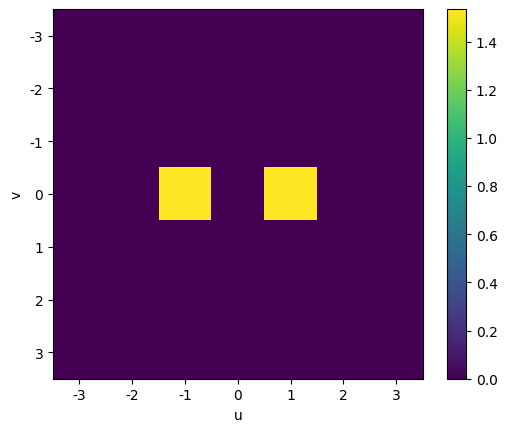

In [8]:
import matplotlib.pyplot as plt

# Pick an l and m.
l = 1
m = 0
lm_index = gtp_utils.to_lm_index(l, m)
plt.imshow(jnp.abs(y_grid_lmax)[lm_index, :, :].T)
plt.xlabel("u")
plt.ylabel("v")
plt.xticks(ticks=jnp.arange(2 * lmax + 1), labels=jnp.arange(-lmax, lmax + 1))
plt.yticks(ticks=jnp.arange(2 * lmax + 1), labels=jnp.arange(-lmax, lmax + 1))
plt.colorbar()
plt.show()

In [9]:
# Test equivariance
gaunt_tensor_product_fourier_2D_fn = lambda x1, x2: functional.gaunt_tensor_product_fourier_2D(
    x1, x2, res_theta=6, res_phi=6, convolution_type="direct"
)
gaunt_tensor_product_fourier_2D_fn = jax.jit(gaunt_tensor_product_fourier_2D_fn)

tp_original = gaunt_tensor_product_fourier_2D_fn(x1, x2)

R = e3nn.rand_matrix(jax.random.PRNGKey(3))
tp_rotated = gaunt_tensor_product_fourier_2D_fn(x1.transform_by_matrix(R), x2.transform_by_matrix(R))

tp_original.transform_by_matrix(R), tp_rotated

/Users/ameyad/Documents/PriceofFreedom/.venv/lib/python3.11/site-packages/jax/_src/ops/scatter.py:92: FutureWarning: scatter inputs have incompatible types: cannot safely cast value from dtype=complex128 to dtype=complex64 with jax_numpy_dtype_promotion='standard'. In future JAX releases this will result in an error.
  warnings.warn(


AttributeError: DynamicJaxprTracer has no attribute array

In [ ]:
tp_s2grid = functional.gaunt_tensor_product_s2grid(
    x1,
    x2,
    res_beta=100,
    res_alpha=99,
    quadrature="gausslegendre",
    p_val1=1,
    p_val2=1,
    s2grid_fft=False,
)
tp_s2grid

In [ ]:
y1_grid = gtp_utils.compute_y_grid(2, res_theta=100, res_phi=200)
z_grid = gtp_utils.compute_z_grid(2, res_theta=100, res_phi=200)
x1_uv = jnp.einsum("a,auv->uv", x1.array, y1_grid)
x1_restored = jnp.einsum("uv,auv->a", x1_uv.conj(), z_grid)
x1.array, x1_restored.real, jnp.isclose(x1.array, x1_restored.real, atol=5e-3)

In [ ]:
tp_fourier_2D_direct = functional.gaunt_tensor_product_fourier_2D(
    x1, x2, res_theta=100, res_phi=99, convolution_type="direct"
)
tp_fourier_2D_fft = functional.gaunt_tensor_product_fourier_2D(
    x1, x2, res_theta=100, res_phi=99, convolution_type="fft"
)
jnp.isclose(tp_fourier_2D_direct.array, tp_fourier_2D_fft.array)

In [ ]:
# Test equivariance
tp_original = functional.gaunt_tensor_product_s2grid(
    x1,
    x2,
    res_beta=100,
    res_alpha=99,
    quadrature="gausslegendre",
    p_val1=1,
    p_val2=1,
    s2grid_fft=False,
)
R = e3nn.rand_matrix(jax.random.PRNGKey(0))
tp_rotated = functional.gaunt_tensor_product_s2grid(
    x1.transform_by_matrix(R),
    x2.transform_by_matrix(R),
    res_beta=100,
    res_alpha=99,
    quadrature="gausslegendre",
    p_val1=1,
    p_val2=1,
    s2grid_fft=False,
)
tp_original.transform_by_matrix(R), tp_rotated